# STA 141B Midterm


## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Sungwon

Last Name: Lee

Student ID: 912978026

## Instructions

Answer the questions below, adding cells in your solution notebook between the problem numbers. Don't change the cells in which the exercise numbers have been written. 

Once you are finished, print your solution notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit this pdf to gradescope. Also submit a zipped folder containing your solution notebook, dataset, codebook, and pdf to the Canvas assignment 'midterm.' (IMPORTANT: notice you will be submitting work twice, once on Canvas, once on Gradescope!)

Remember, this must be your work, and your work alone. You can post questions on piazza, but do NOT talk about your work or otherwise collaborate with others, inside or outside of the class. 


- DO add cells in between the exercise statements and add answers within them and
- DO NOT modify the existing cells
- you MAY add multiple cells between exercise cells when it's convenient

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

**Exercise 1.**

Sungwon Lee

**Exercise 2.** 

In [188]:
import pandas as pd
import numpy as np


# 2.a
df = pd.read_csv("tastdb-2010.csv", encoding='iso-8859-1').replace(r'^\s*$', np.NaN, regex=True)

In [189]:
# 2.b
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32267 entries, 0 to 32266
Data columns (total 98 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   voyageid      32267 non-null  int64 
 1   evgreen       23893 non-null  object
 2   shipname      30910 non-null  object
 3   national      23773 non-null  object
 4   natinimp      31192 non-null  object
 5   placcons      8797 non-null   object
 6   yrcons        6111 non-null   object
 7   placreg       7193 non-null   object
 8   yrreg         4505 non-null   object
 9   rig           20221 non-null  object
 10  tonnage       15985 non-null  object
 11  tonmod        14956 non-null  object
 12  guns          5934 non-null   object
 13  ownera        20087 non-null  object
 14  ownerb        7472 non-null   object
 15  ownerc        4035 non-null   object
 16  ownerd        2657 non-null   object
 17  ownere        1850 non-null   object
 18  ownerf        1296 non-null   object
 19  owne

**# 2.c**

**Definition of columns**

voyageid : Voyage identification(number format: F6)

evgreen : Voyage in 1999 CD-Rom

shipname : Name of vessel

[national, natinimp] : Country number in which ship registered

[placcons, yrcons, yrreg] : Information about vessel's construction

placreg : Vessel's registration

rig : Rig of vessel(type of the ship)

[tonnage, tonmode] : ton and definition of ton used in tonnage of vessel

guns: Guns mounted

[ownera, ownerb, ownerc, ownerd, ownere, ownerf, ownerg, ownerh, owneri, ownerj, ownerk, ownerl, ownerm, ownern, ownero, ownerp] : owners of the slave ships

[fate, fate2, fate3, fate4] : Outcome of voyage

Resistance : African resistance

ptdepimp : imputed port where voyage began

[plac1tra, plac2tra, plac3tra] : place where slave purchase

mjbyptimp : place where slave purchased    

npafttra : port of call before Atlantic crossing

[sla1port, adpsale1, adpsale2] : place of slave landing

mjslptimp : imputed principal port of slave disembarkation

portret : place where voyage ended

yearam : year of arrival at port of disembarkation

[Date_buy, Date_leftAfr, Date_land1, Date_depam, Date_end] : Date of slave and voyage events

[voy1imp, voy2imp] : voyage length of disembarkation(days)

[captaina, captainb, captainc] : captin's name

[crew1, crew3, crewdied] : information of crews

slintend : slaves intended from first port of purchase

[ncar13, ncar15, ncar17] : slaves carried

tslavesd : total slaves on board

[slaximp, slaarriv, slas32, slas36, slas39, slamimp] : info of slaves embarked and disembarked

[menrat7, womrat7, boyrat7, girlrat7, malrat7, chilrat7] : percentage of people at departure or arrival

jamcaspr : average price of slaves in Jamaica

[vymrtimp, vymrtrat] : slaves death

[sourcea, sourceb, sourcec, sourced, sourcee, sourcef, sourceg, sourceh, sourcei, sourcej, sourcek, sourcel, sourcem, sourcen, sourceo, sourcep, sourceq, sourcer] : Source information





**Exercise 3.**

**# 3.a**

What variable would you use to estimate the total number of captives taken from Africa?

Ans. "tslavesd"

In [190]:
Tot_TSmissing = df['tslavesd'].isnull().sum()
print(f"There are total {Tot_TSmissing: ,} values are missing.")

There are total  24,693 values are missing.


In [191]:
# 3.b

tot_slaves = pd.to_numeric(df['tslavesd']).sum()
nonMissing = df['tslavesd'].describe()[0]

tot_slaves/(nonMissing/len(df))
print(f"Preliminary estimate of the total number of captives taken from Africa: {tot_slaves/(nonMissing/len(df)): ,}")

Preliminary estimate of the total number of captives taken from Africa:  10,585,559.374849632


**# 3.c**

What other variables do you expect to be associated with Var A and why? Select 2 top possibilities. 

In my opinion, variables of "slaximp" and "slaarriv" are the two variables that are most likely associated with Var A. "slaximp" is representing the total imputed slaves embarked on the voyage. Since, the slaves were probably embarked to the ship after they were purchased, "tslavesd" variable and "slaximp" variable would have similar data values. For the same reason, "slaariv" variable would also be highly related to "tslavesd", because "slaarriv" represents the total slaves arrived at first port of disembarkation. 


In [192]:
import plotnine as p9
from plotnine import *

In [193]:
DFslave = pd.DataFrame({'tslavesd' : pd.to_numeric(df['tslavesd']), 'slaximp' : pd.to_numeric(df['slaximp']), 'slaarriv' : pd.to_numeric(df['slaarriv'])})

C:\Users\pumad\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 24693 rows containing missing values.


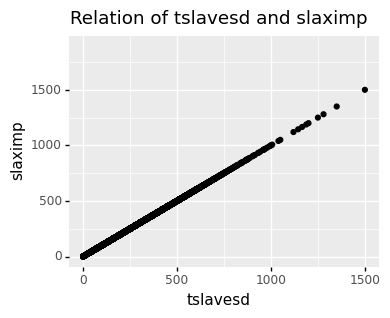

<ggplot: (183771686852)>

In [194]:
gg = p9.ggplot(DFslave) 
gg += p9.aes(x="tslavesd", y="slaximp") 
gg += p9.geom_point() 
gg += p9.ggtitle("Relation of tslavesd and slaximp")
gg += p9.theme(figure_size=(4, 3))

gg

C:\Users\pumad\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 27028 rows containing missing values.


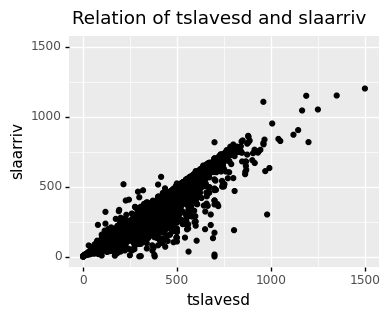

<ggplot: (183772713409)>

In [195]:
gg = p9.ggplot(DFslave) 
gg += p9.aes(x="tslavesd", y="slaarriv") 
gg += p9.geom_point() 
gg += p9.ggtitle("Relation of tslavesd and slaarriv")
gg += p9.theme(figure_size=(4, 3))

gg

In [196]:
# preliminary estimate by using "slaximp"
tot_slaves = pd.to_numeric(df['slaximp']).sum()
nonMissing = df['slaximp'].describe()[0]

tot_slaves/(nonMissing/len(df))

9568845.978130955

According to the graphs above, we can see that both "slaximp" and "slaarriv" variables have positive realtionship with Var A(tslavesd). Especially the first graph shows that "slaximp" and Var A(tslavesd) have almost same values. Therefore, when we preliminary estimate the total number of captives from Africa using the "slaximp", we could get the value of approximately 9,568,845. The difference of the answer on 3.b and 9,568,845 is approximately 1016714. Since the difference is huge, it is hard to trust the answer to 3.b because "slaximp" had less missing values, so it would give us more precise result. 

**Exercise 4.**

In [197]:
# 4.a 

# Subselect the values of national that have more than 300 voyages with that value. 

pd.DataFrame(df['national'].value_counts() > 300)[pd.DataFrame(df['national'].value_counts() > 300)['national'] == True].index


Index(['7', '4', '10', '9', '8', '1', '5'], dtype='object')

In [198]:
# 4.b

# Create a DataFrame that filters out the voyages where national does not have one of thes values.

new_df = pd.DataFrame(df[df['national'].isin(df['national'].value_counts()[df['national'].value_counts() > 300].index)])

In [199]:
new_df.head()

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1,Pastora de Lima,4,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16,1,Sociedade,4,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,95,1,Patrocínio,4,6,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,114,1,NaN,10,10,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,115,1,NaN,10,10,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# 4.c

# nationality = {"Spain" : "1", "Portugal" : "4", "Brazil" : "5",
#               "Great Britiain" : "7", "Netherlands" : "8", "U.S.A" : "9", 
#               "France" : "10"}


def assn(data):
    if data['national'] == "1":
        val = "Spain"
    elif data['national'] == "4":
        val = "Portugal"
    elif data['national'] == "7":
        val = "Great Britain"
    elif data['national'] == "5":
        val = "Brazil"
    elif data['national'] == "8":
        val = "Netherlands"
    elif data['national'] == "9":
        val = "U.S.A"
    elif data['national'] == "10":
        val = "France"
        
    return val


new_df['nationality'] = new_df.apply(assn, axis=1)
        

In [201]:
new_df[['national', 'nationality']]

,national,nationality
0,4,Portugal
15,4,Portugal
94,4,Portugal
113,10,France
114,10,France
...,...,...
32260,4,Portugal
32261,10,France
32262,4,Portugal
32263,10,France


In [202]:
new_df

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,nationality
0,1,1,Pastora de Lima,4,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal
15,16,1,Sociedade,4,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal
94,95,1,Patrocínio,4,6,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal
113,114,1,NaN,10,10,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
114,115,1,NaN,10,10,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32260,900231,NaN,NS do Rosario,4,NaN,NaN,NaN,NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal
32261,900232,NaN,Tourville,10,NaN,NaN,NaN,NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
32262,900233,NaN,General Rêgo,4,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal
32263,900234,NaN,Duas Clementinas,10,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France


In [203]:
# 4.d


# (ggplot(new_df) + 
#  aes(x='yearam', y = new_df.nationality.value_counts())
# )


# df.groupby(['years', 'causes'])['something_else'].count()

cnts = new_df.groupby(['yearam', 'nationality'])['voyageid'].count()
cnts = cnts.reset_index()

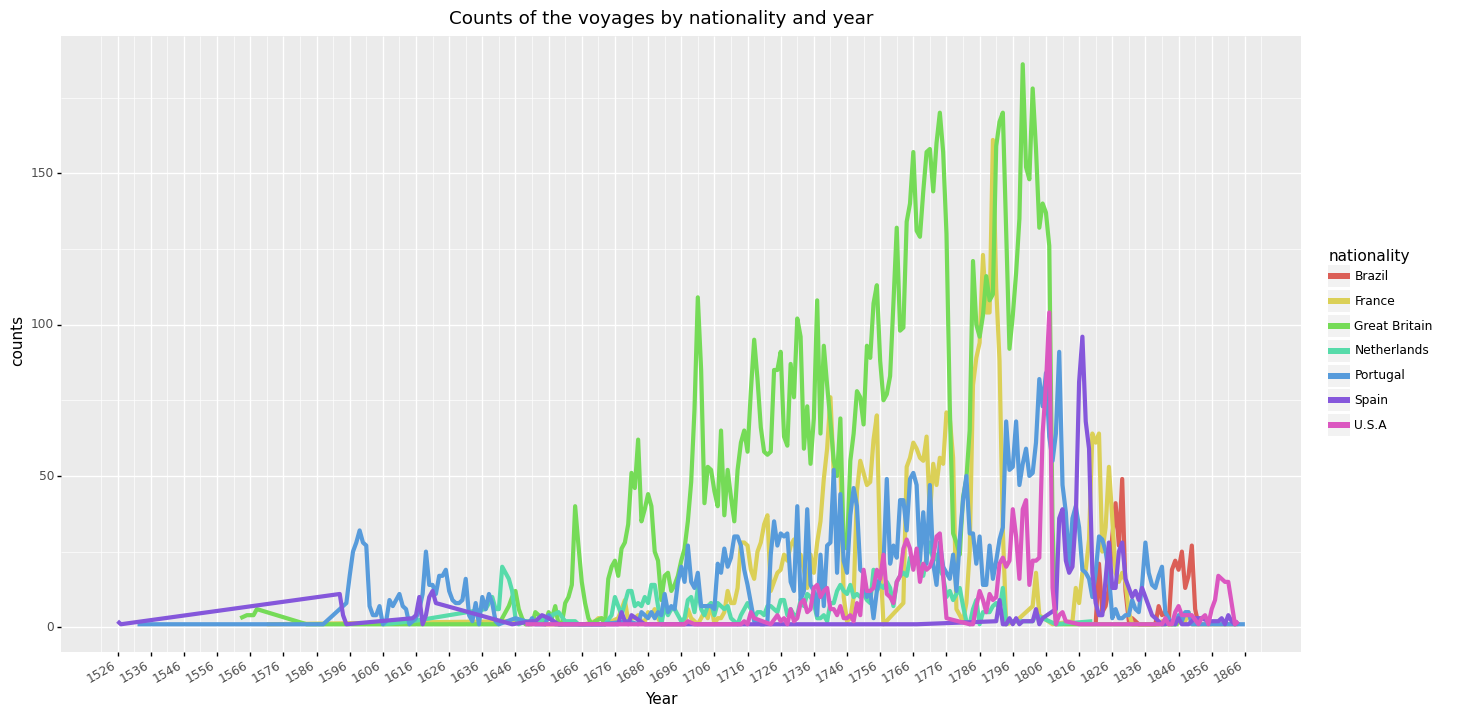

<ggplot: (183799865893)>

In [204]:
gg = p9.ggplot(cnts)
gg += p9.aes(x='yearam',
             y='voyageid',
             color='nationality') # add color mapping
gg += p9.geom_line(alpha=1, size =1.7)
gg += ylab('counts')
gg += xlab("Year")
gg += labs(title = "Counts of the voyages by nationality and year")
gg += theme(figure_size=(16, 8),
           axis_text_x  = element_text(angle = 30, hjust = 1))
gg += scale_x_continuous(breaks=range(1526,1867,10))

gg

**# 4.e**

In this plot, the aesthetic mapping is the x-axis, y-axis, and colors that I used to represent each nationality. The x-axis is yearam, which refers to the year that the ship had arrived at the port of disembarkation. The y-axis is representing the number of voyages counted for each year. The geometric element used in this plot is the shape of the graph. Here, I used a line graph to illustrate the data followed by time series so that it could show readers how did the number of voyages of each nationality had changed over time. Lastly, I used other components of the grammar of graphics such as theme. Since each year is four digits and I scaled from the year 1526 to 1866 by every 10th year. Thus, to prevent overlapping x-labels, I rotated the x-labels by 30 degrees so that I could increase the readability. Also, I made the line width to be thicker than the default, because the default size was to thin to easily get the interpretation.   




**# 4.f**

We could observe the drastic change of the counts from Great Britain and France. The two nations had similar patterns. The number of voyages count was rapidly dropped and then rose between the years 1776 and 1786. The major event that could possibly affect the Trading Slave was The Franco-American Alliance in 1778. In 1778, the United States and France formed a military alliance to counter Great Britain. Also, before the 1770s, most of the Europeans provided only markets for slavery. However, starting in 1778, many Europeans began to actively intervene in the slave trade, such as sailing directly to Africa. Hence, I think these are the main reasons that caused the abrupt changes of the plot between 1776 and 1786. 


**Exercise 5.**

In [205]:
# 5.a

# new_df[new_df['shipname']=='r\'][['yearam', 'placcons', 'placreg','yrreg','captaina','captainb','captainc']]

arr = np.where(new_df.shipname.str.contains(r'(Brook)') == True)

lst = []
for i in arr[0][0:]:
    lst.append(i)
    

    
Brook_df = new_df.iloc[lst]

C:\Users\pumad\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [206]:
Brook_df[['shipname', 'yearam', 'placcons','yrcons','placreg', 'yrreg', 'tonnage', 'tonmod', 'captaina', 'captainb', 'captainc',
         'fate', 'fate2', 'fate3', 'fate4', 'Date_dep']]

,shipname,yearam,placcons,yrcons,placreg,yrreg,tonnage,tonmod,captaina,captainb,captainc,fate,fate2,fate3,fate4,Date_dep
10364,Brooke,1752,10432,1737,10432,1747,150,272.3,Meadows,"Kewley, Thomas",NaN,1,1,14,1,NaN
11525,Brooke,1748,10432,1737,10432,1747,150,272.3,"White, John",NaN,NaN,1,1,14,1,1/10/1747
26856,Brooke,1800,10433,1784,10432,1800,352,352,"Molyneux, Thomas",NaN,NaN,1,1,14,1,5/6/1800
26857,Brooke,1802,10433,1784,10432,1800,352,352,"Hayes, John",NaN,NaN,1,1,14,1,8/1/1801
26858,Brooke,1803,10433,1784,10432,1800,352,352,"Tucker, Joseph",NaN,NaN,1,1,14,1,2/9/1803
26859,Brooke,1807,10433,1784,10432,1804,352,352,"Cormack, George S",NaN,NaN,1,1,14,1,10/18/1806
26860,Brooks,1782,10432,1781,10432,1781,297,297,"Noble, Clement",NaN,NaN,1,1,14,1,10/4/1781
26861,Brooks,1784,10432,1781,10432,1783,297,297,"Noble, Clement",NaN,NaN,1,1,14,1,6/3/1783
26862,Brooks,1785,10432,1781,10432,1783,297,297,"Noble, Clement",NaN,NaN,1,1,14,1,2/2/1785
26863,Brooks (a) Brookes,1787,10432,1781,10432,1786,297,297,"Molyneux, Thomas",NaN,NaN,1,1,14,1,10/17/1786


In [207]:
Filtered_Br = Brook_df[(Brook_df['yrcons'] == '1781') & (Brook_df['tonnage'].isin(['297', '300', '319', '352', '353']))]
Filtered_Br

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,nationality
26860,80663,1,Brooks,7,7,10432,1781,10432,1781,4,...,"Crooks,55","LList, 19 Nov 1782","LList, 25 Feb 1783","Williams,585-86",NaN,NaN,NaN,NaN,NaN,Great Britain
26861,80664,1,Brooks,7,7,10432,1781,10432,1783,4,...,"Lambert,73,81-101","Lambert,73,109-21","LList, 20 July 1784","LList, 6 Aug 1784","LList, 31 Aug 1784",NaN,NaN,NaN,NaN,Great Britain
26862,80665,1,Brooks,7,7,10432,1781,10432,1783,4,...,"Lambert,69,III,Appendix,Jamaica","LList, 31 Jan 1786","LList, 14 Apr 1786","Williams,585",NaN,NaN,NaN,NaN,NaN,Great Britain
26863,80666,1,Brooks (a) Brookes,7,7,10432,1781,10432,1786,4,...,"Lambert,68,41-3","cc, 13 Oct 1787","craig,19","LList, 11 Dec 1787","LList, 12 Feb 1788",T70/1476,"Williams,585","Huntington,ST,vol.26,87.11.10.",NaN,Great Britain
26864,80667,1,Brooks,7,7,10432,1781,10432,1791,4,...,"HLRO,MP,HL,1800.07.28","craig,19","LList, 20 Mar 1792",NaN,NaN,NaN,NaN,NaN,NaN,Great Britain
26865,80668,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great Britain
26866,80669,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,"MMM, C/EX/L/5/2,1791.050",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great Britain
26867,80670,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,"LList, 10 July 1798","LList, 30 Oct 1798","MMM, C/EX/L/5/2,1791.050",NaN,NaN,NaN,NaN,NaN,NaN,Great Britain
26868,80671,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great Britain
26869,80672,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great Britain


In [208]:
print(f"By filtering according to the certain conditions mentioned in Wikipedia, we could get the result of {len(Filtered_Br)} voyages total are in the data.")

By filtering according to the certain conditions mentioned in Wikipedia, we could get the result of 11 voyages total are in the data.


In [209]:
# 5.b

def assn2(data):
    if data['resistance'] == "1" or data['resistance'] == '2' or data['resistance'] == '3' or data['resistance'] == '4' or data['resistance'] == '5' or data['resistance'] == '6':
        val = True
    else:
        val = False
 
    return val

In [210]:

new_df['IfResistance'] = new_df.apply(assn2, axis=1)

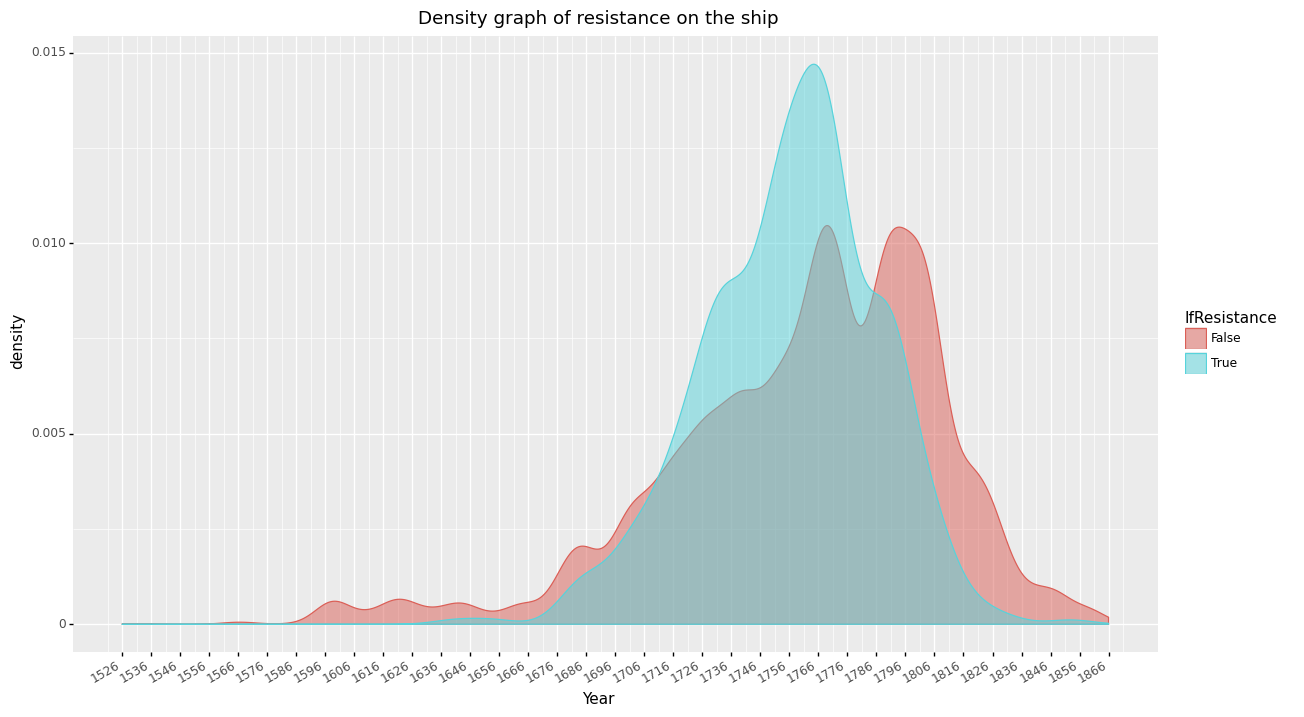

<ggplot: (183799780840)>

In [211]:
(
    ggplot(new_df, aes(x='yearam', color='IfResistance', fill='IfResistance'))
    + geom_density(alpha=0.5)
    + labs(title = "Density graph of resistance on the ship")
    + xlab("Year")
    + theme(figure_size = (14,8),
           axis_text_x  = element_text(angle = 30, hjust = 1))
    + scale_x_continuous(breaks=range(1526,1867,10))
)



In this plot, the blue graph is showing that there was resistance or at least trying to revolt on the ship or the shore. The red graph shows False or uncertain values. Since it represents the density of each variable, not the real counts, this does not mean that there are more cases of rebellion on the ship than there have been none. According to the plot, we can see both True and False graph increase over time especially in the 1700s because the 18th century was the peak of voyages for the slave trade. Also, from this density graph, we can observe that approximately from the 1750s to 1770s had the largest density difference between True and False. which means that many rebels happened during that period. 


In [212]:
# 5.c

year = list(range(1839,1849,1))

new_df[new_df['yearam'].isin(year) & new_df['IfResistance'] == True]


arr = np.where(new_df.shipname.str.contains(r'(Amistad)') == True)

lst = []
for i in arr[0][0:]:
    lst.append(i)
    

  
Amistad_df = new_df.iloc[lst]
# Amistad_df[new_df['yearam'].isin(year)]

Amistad_df[['voyageid','shipname','rig','yearam','ownera','fate','fate2','fate3','fate4', 'resistance','nationality']]

C:\Users\pumad\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,voyageid,shipname,rig,yearam,ownera,fate,fate2,fate3,fate4,resistance,nationality
769,774,Amistad Habanera,2,1829,NaN,1,1,14,1,NaN,Spain
935,940,Amistad Habanera,2,1829,NaN,1,1,14,1,NaN,Spain
959,964,Amistad Habanera,51,1830,NaN,1,1,14,1,NaN,Spain
1159,1196,Amistad Habanera,51,1830,NaN,49,1,14,1,NaN,Spain
5551,14622,Amistad,45,1815,NaN,49,1,14,1,NaN,Spain
5584,14656,Amistad,45,1816,NaN,49,1,14,1,NaN,Spain
5667,14742,Amistad,45,1817,NaN,49,1,14,1,NaN,Spain
5767,14844,Nueva Amistad,45,1818,NaN,1,1,14,1,NaN,Spain


In [213]:
Amistad_df[Amistad_df['rig']=='2'][['voyageid','shipname','rig','yearam','ownera','fate','fate2','fate3','fate4', 'resistance','nationality']]

,voyageid,shipname,rig,yearam,ownera,fate,fate2,fate3,fate4,resistance,nationality
769,774,Amistad Habanera,2,1829,NaN,1,1,14,1,NaN,Spain
935,940,Amistad Habanera,2,1829,NaN,1,1,14,1,NaN,Spain


According to the aspects depicted in the "https://en.wikipedia.org/wiki/La_Amistad", we could find only two ships that were matching the aspects in 10 year period. However, we could not assure that this is the "La Amistad" ship because the resistance variable is missing and the fate of this ship was not ended with the slave revolt and also it did not captured to US navy. 

**Exercise 6.**

In [214]:
# 6.a

A_df = new_df[new_df['ptdepimp'].notnull() & new_df['sla1port'].notnull()].reset_index()

In [215]:
A_df = A_df.drop(['index'], axis=1)

In [216]:
A_df['LastDep'] = ["Europe" if x.startswith("1") else "North America" if x.startswith("2") else "Caribbean" if x.startswith("3") else "Spanish Americas" if x.startswith("4") else "Brazil" if x.startswith("5") else "Africa" if x.startswith("6") else "Other" for x in A_df['ptdepimp'] if x]

In [217]:
A_df['FirstArr'] = ["Europe" if x.startswith("1") else "North America" if x.startswith("2") else "Caribbean" if x.startswith("3") else "Spanish Americas" if x.startswith("4") else "Brazil" if x.startswith("5") else "Africa" if x.startswith("6") else "Other" for x in A_df['sla1port'] if x]

In [218]:
A_df[['LastDep', 'FirstArr']]

,LastDep,FirstArr
0,Brazil,Brazil
1,Brazil,Brazil
2,Brazil,Brazil
3,Europe,Caribbean
4,Europe,Caribbean
...,...,...
16722,Europe,Spanish Americas
16723,Europe,Caribbean
16724,Europe,Caribbean
16725,Brazil,Brazil


The column "LastDep" is the variable that shows the last departure of the ship.

The column "FirstArr" is the variable that shows the first arrival of the ship. 

Code : 

10000~19999 => Europe

20000~29999 => North America(Mainland North America)

30000~39999 => Caribbean

40000~49999 => Spanish Americas(Spanish Mainland Americas)

50000~59999 => Brazil

60000~69999 => Africa

80000~89999 => Others

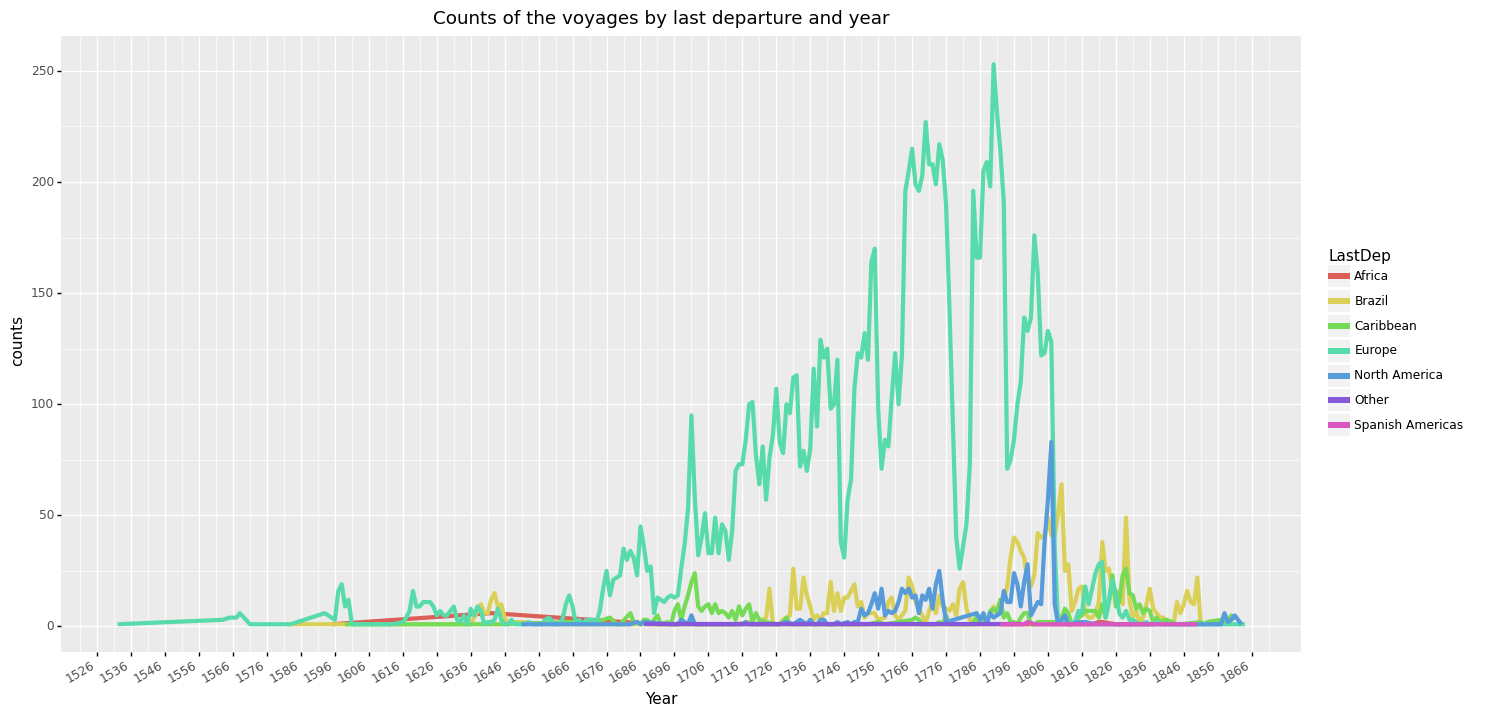

<ggplot: (183797606428)>

In [219]:
# 6.b



counts = A_df.groupby(['yearam', 'LastDep'])['voyageid'].count()
counts = counts.reset_index()



gg = p9.ggplot(counts)
gg += p9.aes(x='yearam',
             y='voyageid',
             color='LastDep') # add color mapping
gg += p9.geom_line(alpha=1, size =1.7)
gg += ylab('counts')
gg += xlab("Year")
gg += labs(title = "Counts of the voyages by last departure and year")
gg += theme(figure_size=(16, 8),
           axis_text_x  = element_text(angle = 30, hjust = 1))
gg += scale_x_continuous(breaks=range(1526,1867,10))


gg

According to this plot, we could see that Europe was the location where most of the voyage was departed.

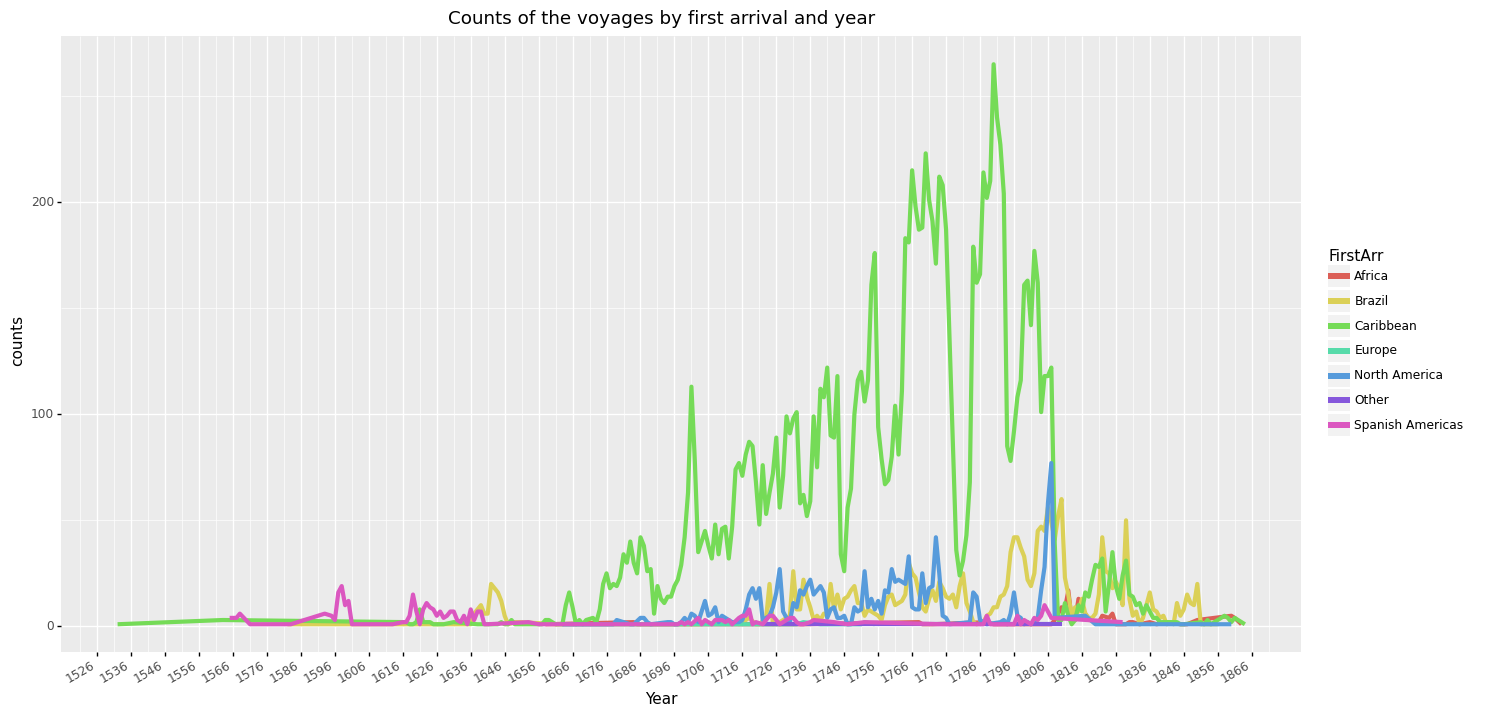

<ggplot: (183777287024)>

In [220]:
# 6.c

counts = A_df.groupby(['yearam', 'FirstArr'])['voyageid'].count()
counts = counts.reset_index()



gg = p9.ggplot(counts)
gg += p9.aes(x='yearam',
             y='voyageid',
             color='FirstArr') # add color mapping
gg += p9.geom_line(alpha=1, size =1.7)
gg += ylab('counts')
gg += xlab("Year")
gg += labs(title = "Counts of the voyages by first arrival and year")
gg += theme(figure_size=(16, 8),
           axis_text_x  = element_text(angle = 30, hjust = 1))
gg += scale_x_continuous(breaks=range(1526,1867,10))


gg

It shows that Caribbean was the location where most of voyages arrived as the first place. As a result of above two plots, we could observe that most of the voyages started from Europe and passed by Caribbean, which meant that Caribbean had the largest slave market. 

In [221]:
# 6.d

men_df = new_df[new_df['menrat7'].notnull()].reset_index()

In [222]:
men_df.groupby(['yearam', 'menrat7']).count()

index  voyageid  evgreen  shipname  national  \
yearam menrat7                                                          
1619   .572769953051643      1         1        1         1         1   
1636   .388235294117647      1         1        1         1         1   
1641   .270142180094787      1         1        0         1         1   
       .367149758454106      1         1        0         1         1   
       .533333333333333      1         1        0         1         1   
...                        ...       ...      ...       ...       ...   
1850   .483443708609272      1         1        1         1         1   
       .511811023622047      1         1        1         0         1   
1851   .578947368421053      1         1        1         1         1   
1854   .5                    1         1        1         1         1   
1860   .252161383285303      1         1        1         1         1   

                         natinimp  placcons  yrcons  placreg  yrreg  ...  \
yearam menrat7                                                       ...   
1619   .572769953051643         1         0       0        0      0  ...   
1636   .388235294117647         1         0       0        0      0  ...   
1641   .270142180094787         1         0       0        0      0  ...   
       .367149758454106         1         0       0        0      0  ...   
       .533333333333333         1         0       0        0      0  ...   
...                           ...       ...     ...      ...    ...  ...   
1850   .483443708609272         1         0       0        0      0  ...   
       .511811023622047         1         0       0        0      0  ...   
1851   .578947368421053         1         0       0        0      0  ...   
1854   .5                       1         0       0        0      0  ...   
1860   .252161383285303         1         1       1        0      0  ...   

                         sourcek  sourcel  sourcem  sourcen  sourceo  sourcep  \
yearam menrat7                                                                  
1619   .572769953051643        0        0        0        0        0        0   
1636   .388235294117647        0        0        0        0        0        0   
1641   .270142180094787        0        0        0        0        0        0   
       .367149758454106        0        0        0        0        0        0   
       .533333333333333        0        0        0        0        0        0   
...                          ...      ...      ...      ...      ...      ...   
1850   .483443708609272        0        0        0        0        0        0   
       .511811023622047        0        0        0        0        0        0   
1851   .578947368421053        0        0        0        0        0        0   
1854   .5                      0        0        0        0        0        0   
1860   .252161383285303        0        0        0        0        0        0   

                         sourceq  sourcer  nationality  IfResistance  
yearam menrat7                                                        
1619   .572769953051643        0        0            1             1  
1636   .388235294117647        0        0            1             1  
1641   .270142180094787        0        0            1             1  
       .367149758454106        0        0            1             1  
       .533333333333333        0        0            1             1  
...                          ...      ...          ...           ...  
1850   .483443708609272        0        0            1             1  
       .511811023622047        0        0            1             1  
1851   .578947368421053        0        0            1             1  
1854   .5                      0        0            1             1  
1860   .252161383285303        0        0            1             1  

[2837 rows x 99 columns]

In [223]:
men_df['menrat7'] = pd.to_numeric(men_df['menrat7'])
men_df[['menrat7']].dtypes

menrat7    float64
dtype: object

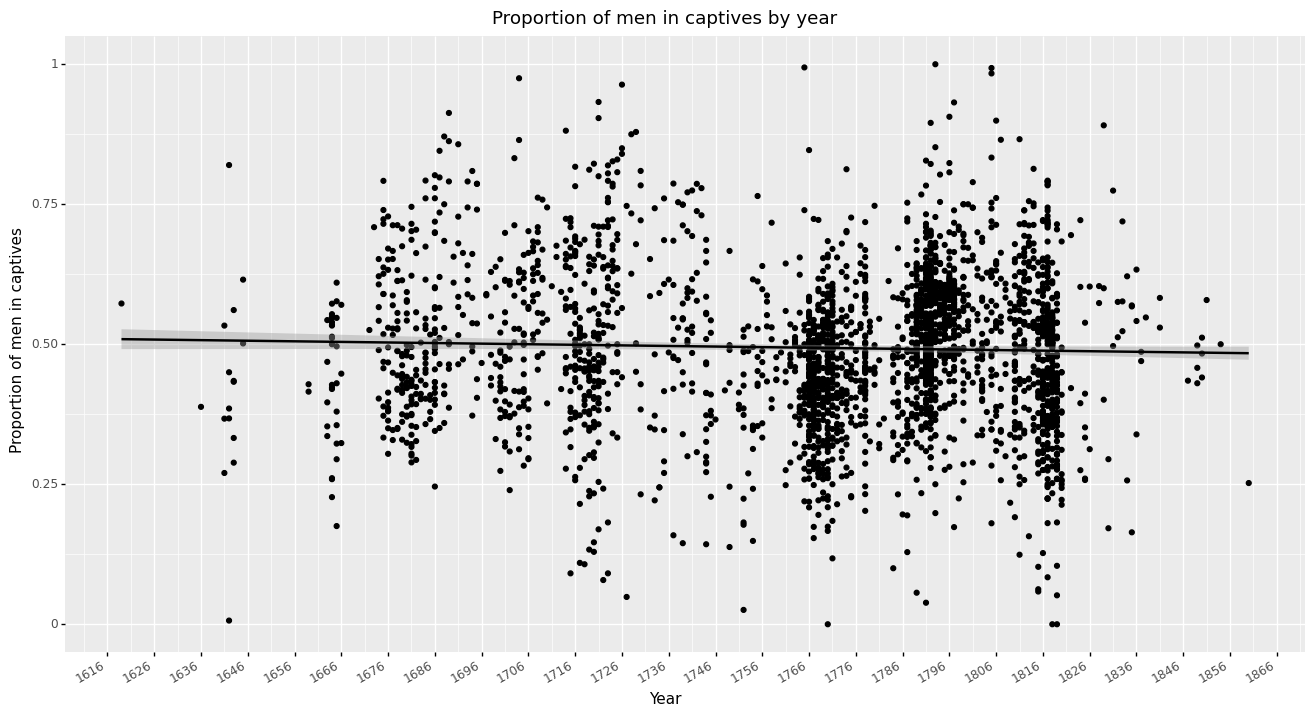

<ggplot: (183795180066)>

In [224]:
# Graph of the proportion of captives that are men as a function of year + smooth

gg = p9.ggplot(men_df)
gg += p9.aes(x = 'yearam', y = 'menrat7')
gg += geom_point()
gg += geom_smooth()
gg += ylab("Proportion of men in captives")
gg += xlab("Year")
gg += labs(title="Proportion of men in captives by year")
gg += scale_x_continuous(breaks=range(1526,1867,10))
gg += theme(figure_size=(16, 8),
           axis_text_x  = element_text(angle = 30, hjust = 1))

gg
    

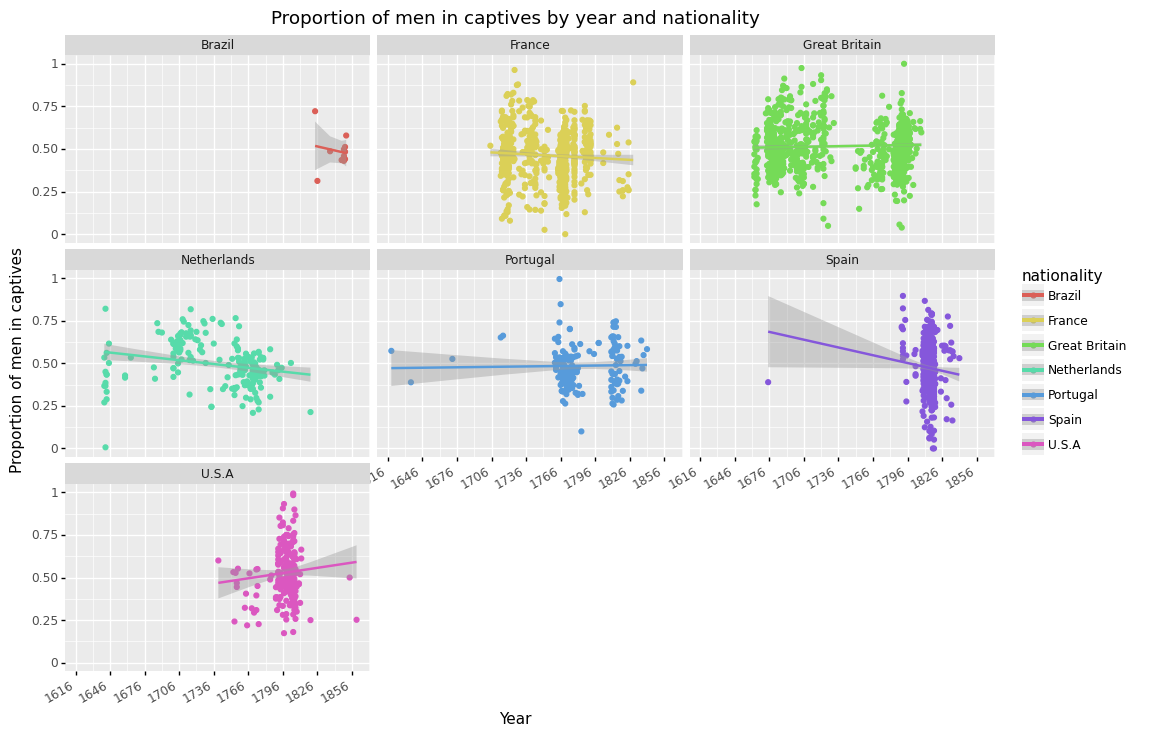

<ggplot: (183777380051)>

In [225]:
# Graph of the proportion of captives that are men as a function of year + smooth + other confounding variable

gg = p9.ggplot(men_df)
gg += p9.aes(x = 'yearam', y = 'menrat7', color='nationality')
gg += p9.facet_wrap('~nationality')
# gg += p9.scale_color_hue(color_space='husl')
gg += geom_point()
gg += geom_smooth(se=True)
gg += ylab("Proportion of men in captives")
gg += xlab("Year")
gg += labs(title="Proportion of men in captives by year and nationality")
gg += scale_x_continuous(breaks=range(1526,1867,30))
gg += theme(figure_size=(12, 8),
           axis_text_x  = element_text(angle = 30, hjust = 1))

gg


**# 6. e**

Here, I used the data "men_df" which excluded missing values for the variable "menrat7" for both plots. In the first graph, the aesthetic mappings are y-axis(the proportion of men that were captured as slaves), x-axis(year). The first geometric is scatter plots that shows all the ratio of captives that were men in middle passage. The second geometric is the smoother to show the linear regression fit line of the scatter plots. The theme was also added on the first plot to show the proper title and labels of x-axis and y-axis. In the second graph, the aesthetic mappings are y-axis, x-axis, and color which represents the nationality. Next, the geometries used are the scatter plots and smoother for the same purpose as those of the first graph. Also, I applied facet to separate the graph by each nationality to make easier to interpret by each country. Lastly, I added the theme to change the labels and the title and adjust the size of the graph. 